In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
proj_data = pd.read_csv(r'D:\projects ds\p-2 diabetes\diabetes.csv')

In [4]:
proj_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#data analysis

In [6]:
proj_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
proj_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
proj_data_copy1 = proj_data.copy(deep = True)

In [9]:
proj_data_copy1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=proj_data_copy1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [10]:
print(proj_data_copy1.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


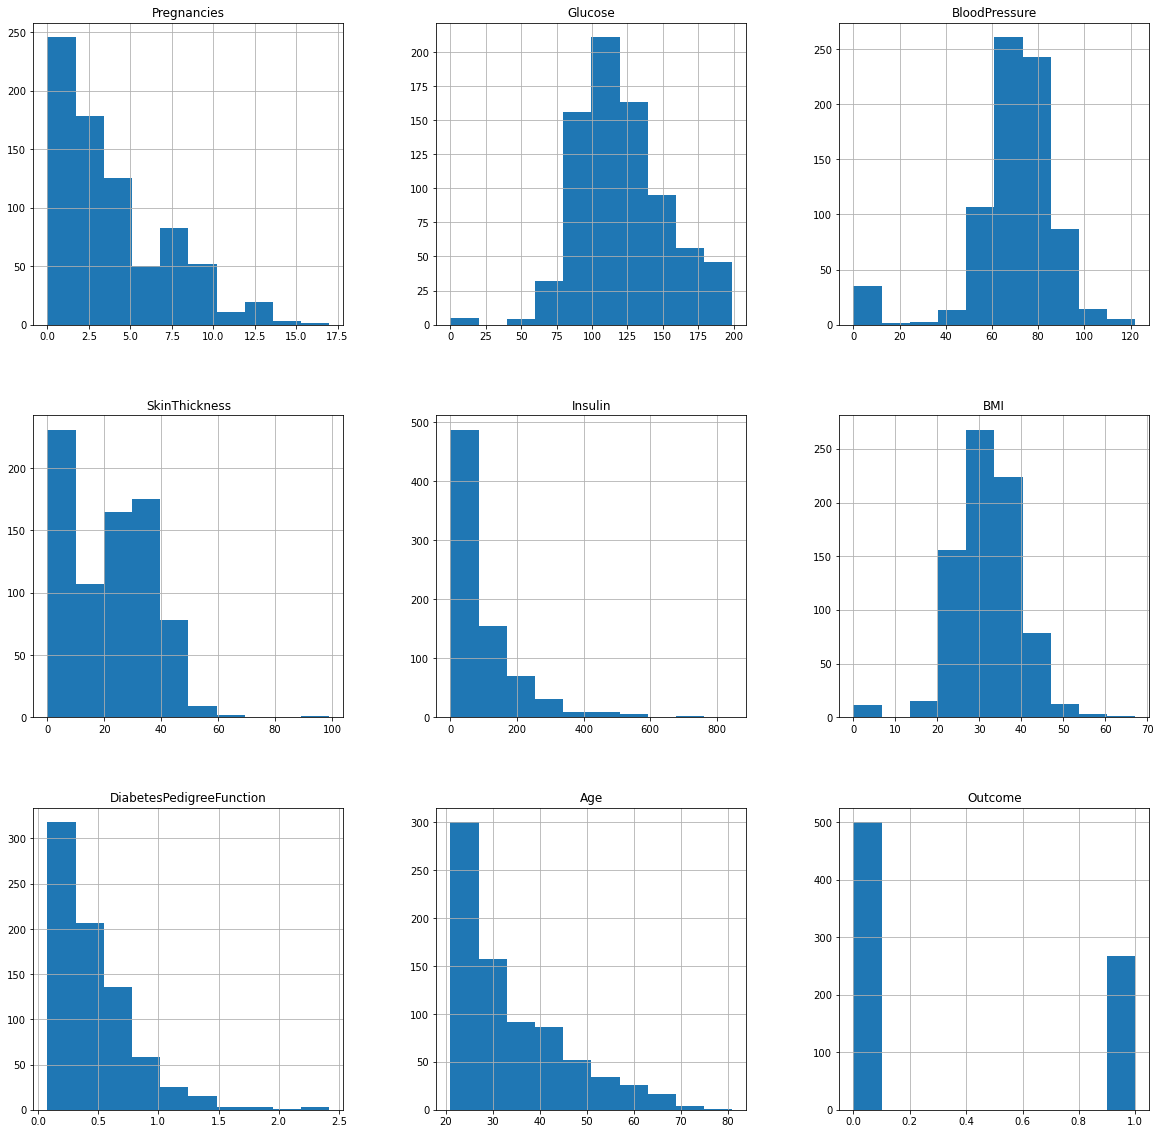

In [11]:
hplot = proj_data.hist(figsize = (20,20))

In [12]:
proj_data_copy1['Glucose'].fillna(proj_data_copy1['Glucose'].mean() , inplace = True )
proj_data_copy1['BloodPressure'].fillna(proj_data_copy1['BloodPressure'].mean() , inplace = True )
proj_data_copy1['SkinThickness'].fillna(proj_data_copy1['SkinThickness'].median() , inplace = True )
proj_data_copy1['Insulin'].fillna(proj_data_copy1['Insulin'].median() , inplace = True )
proj_data_copy1['BMI'].fillna(proj_data_copy1['BMI'].median() , inplace = True )

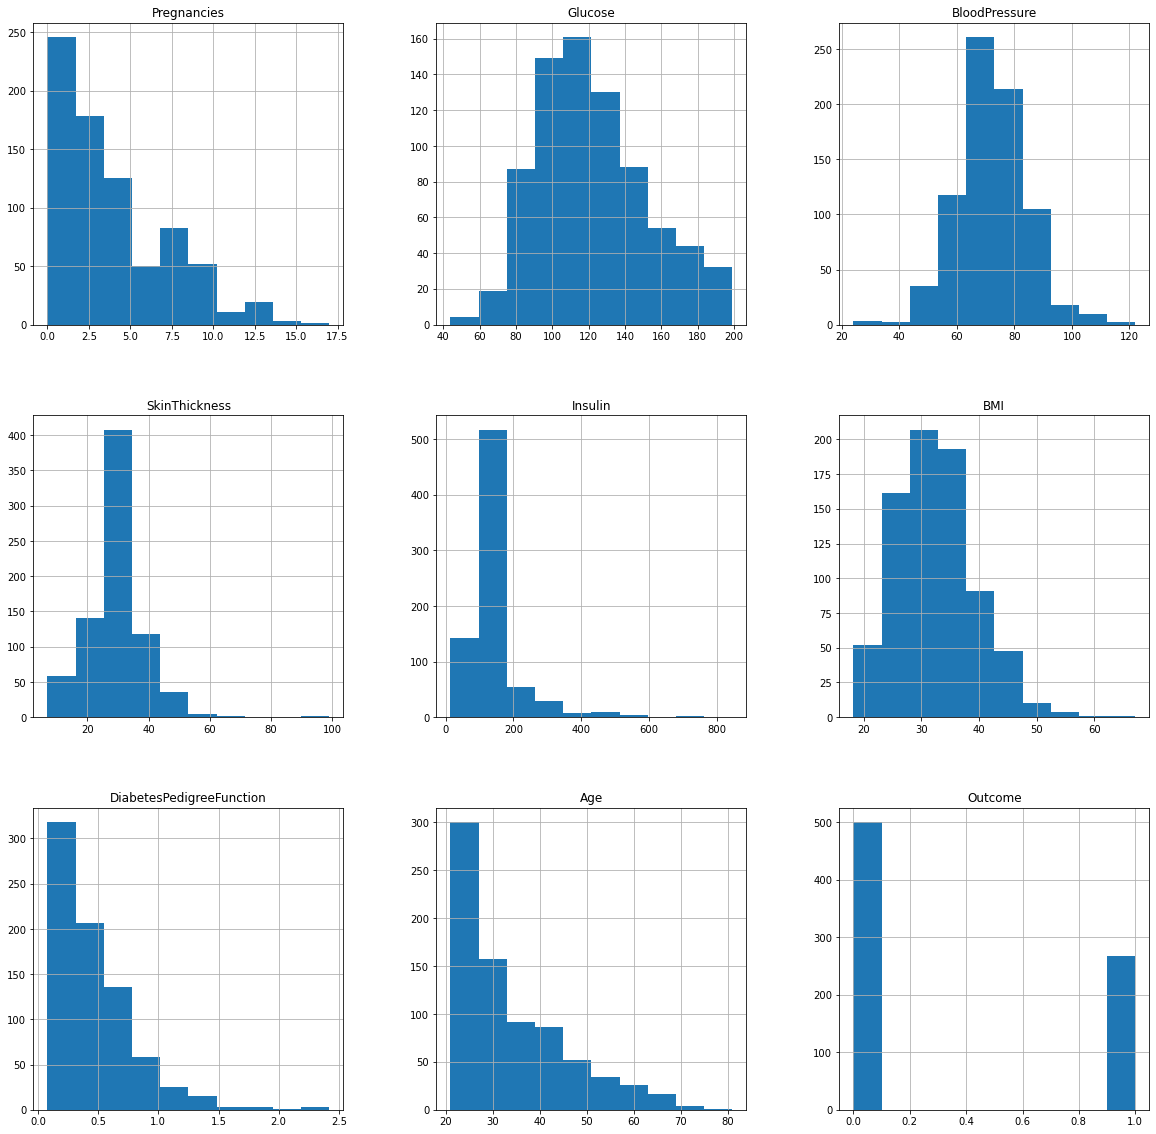

In [13]:
hplot = (proj_data_copy1.hist(figsize = (20,20)))

In [15]:
#aise hi 
proj_data_copy1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [16]:
proj_data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:>

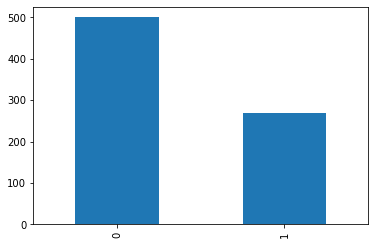

In [17]:
proj_data.Outcome.value_counts().plot(kind='bar')

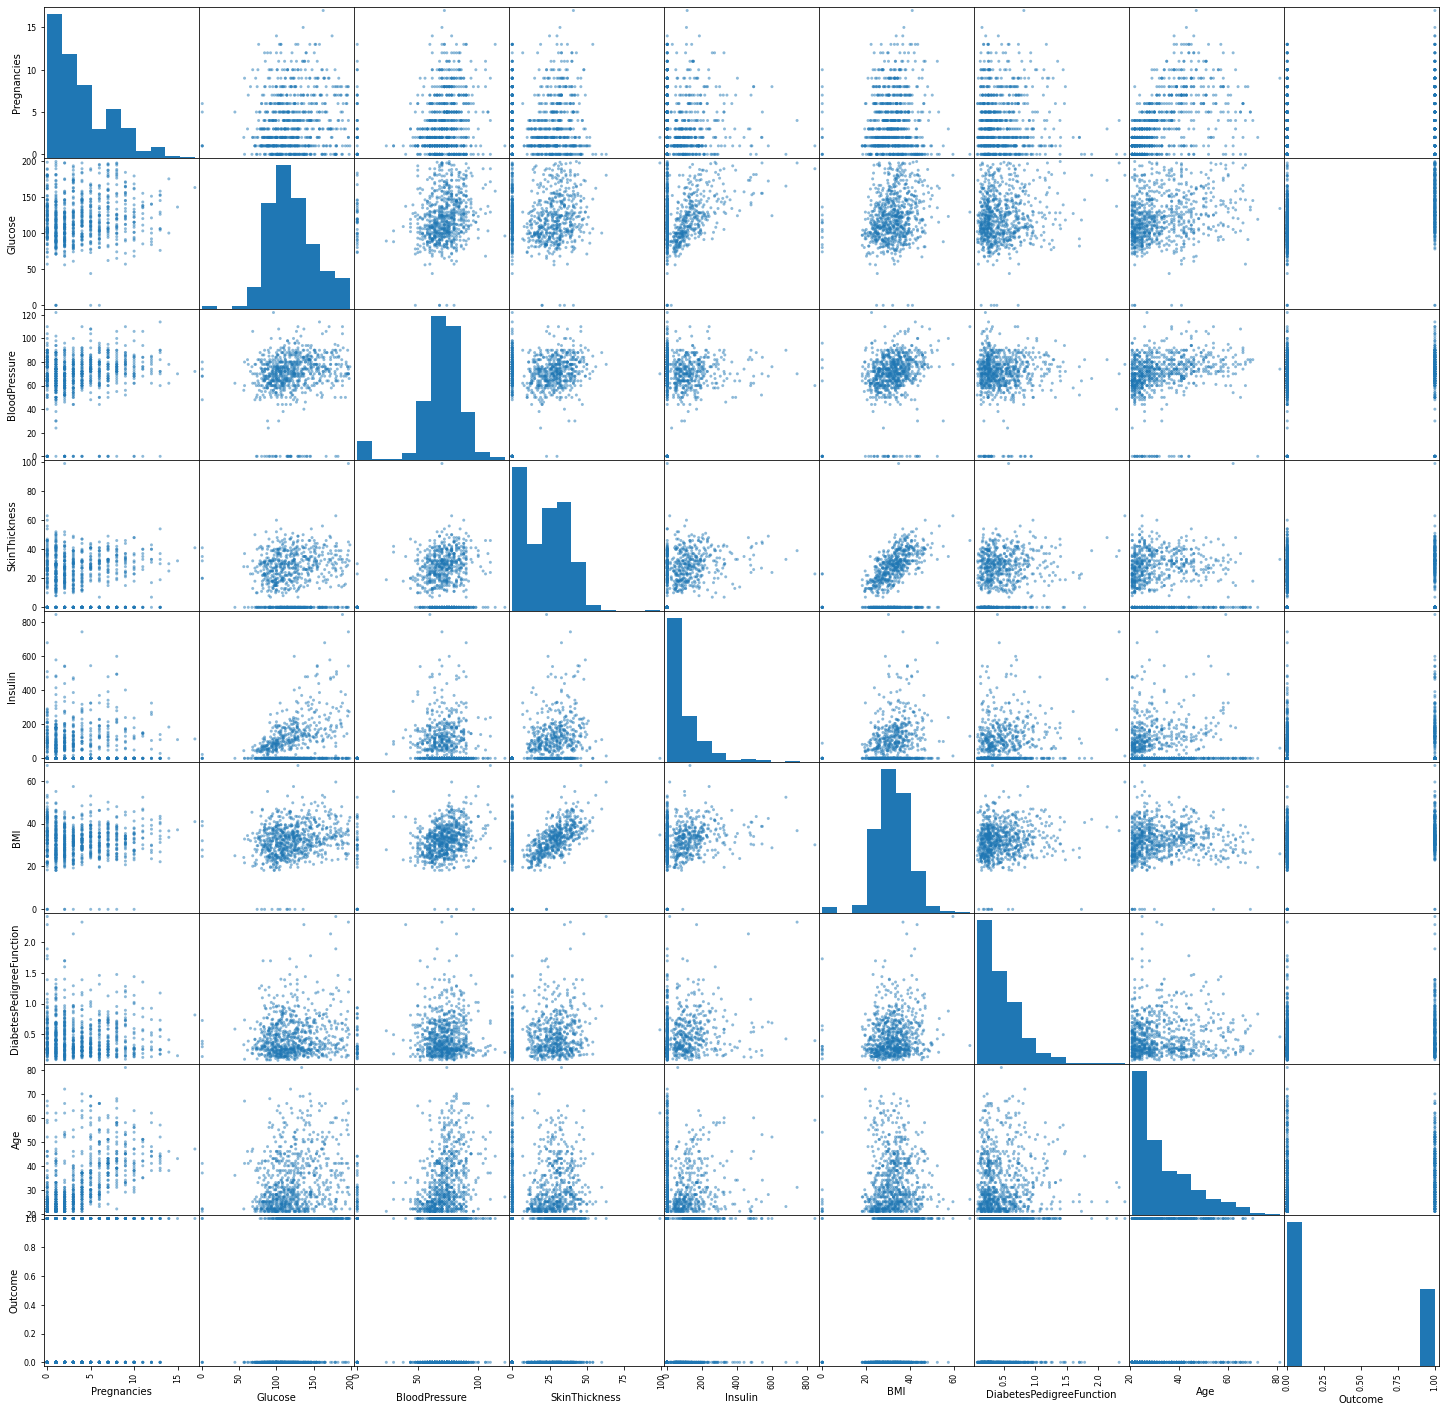

In [21]:
from pandas.plotting import scatter_matrix
#checking for the unclean data
p=scatter_matrix(proj_data,figsize=(25,25))

In [22]:
#now lets check for the clean data

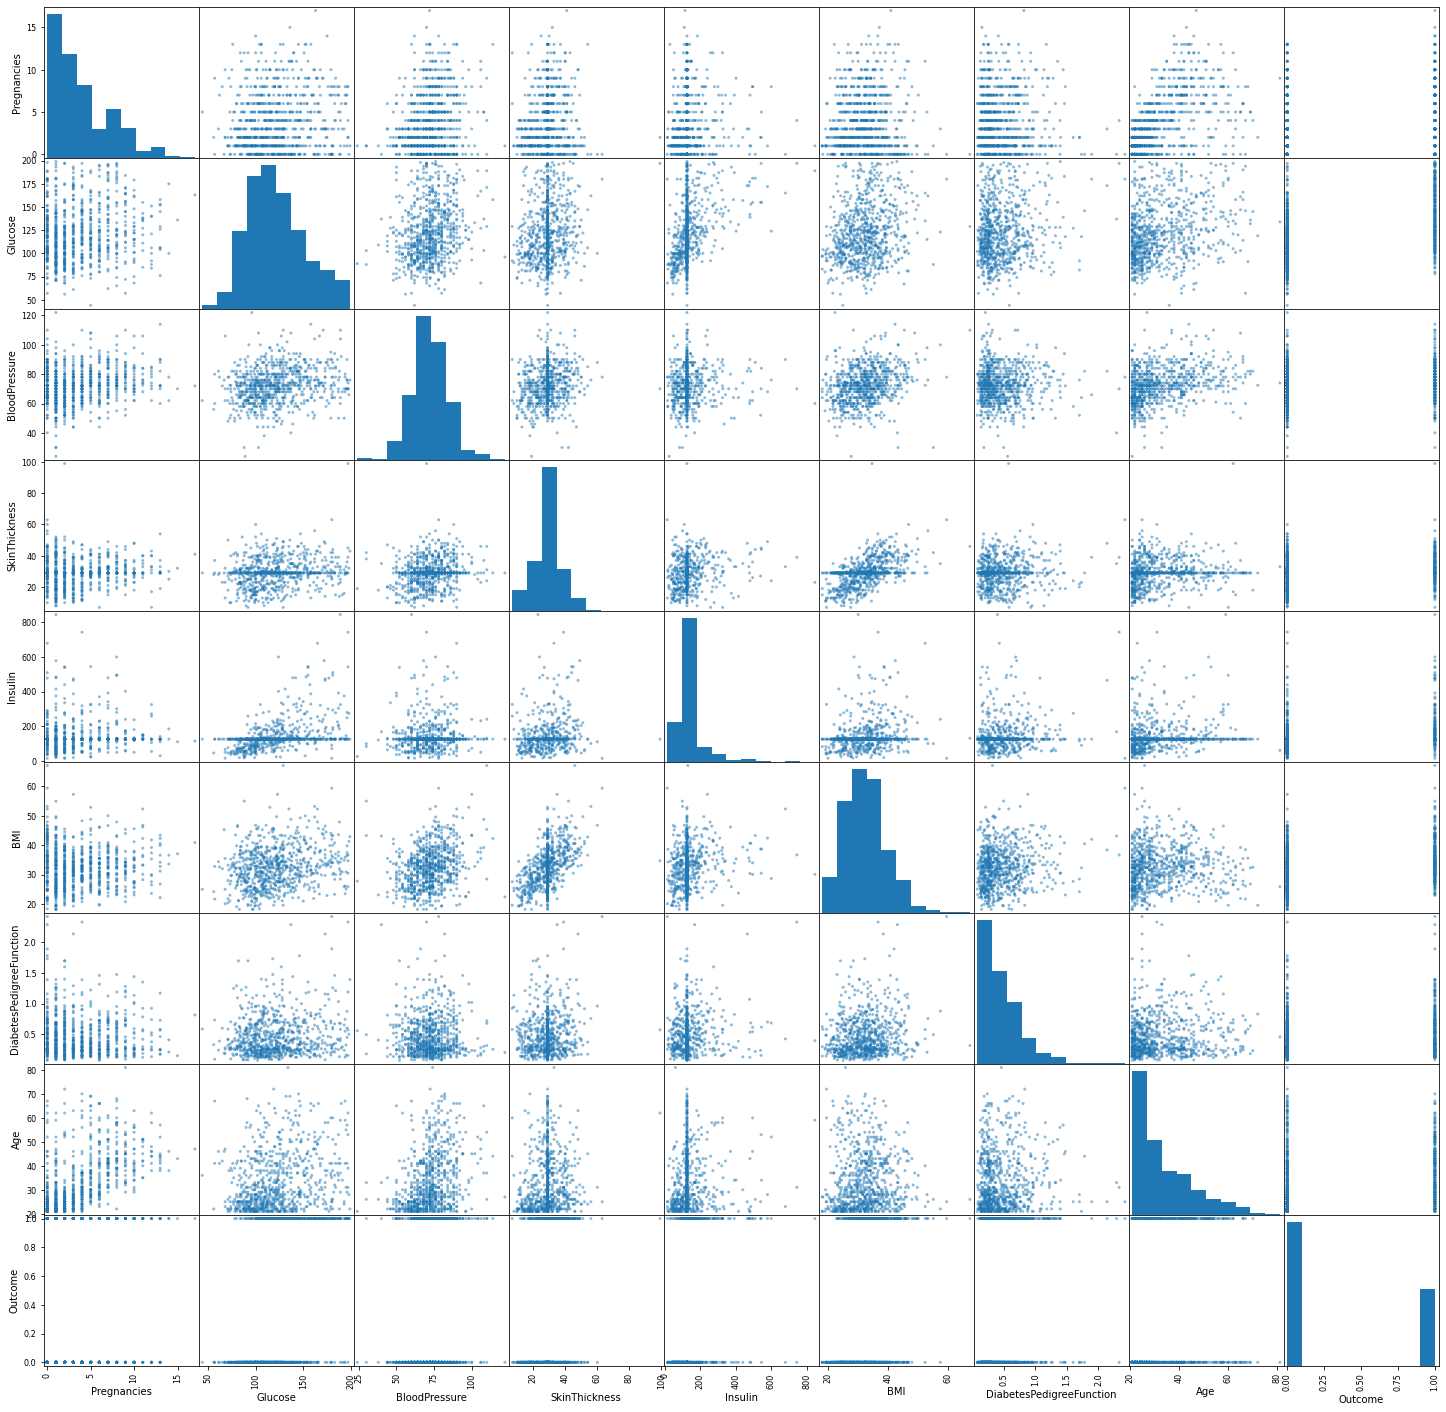

In [23]:
p = scatter_matrix(proj_data_copy1,figsize = (25,25))

In [24]:
#lets make pairplot for clean data
#where pairplot consist of histogram as well as scatter plot

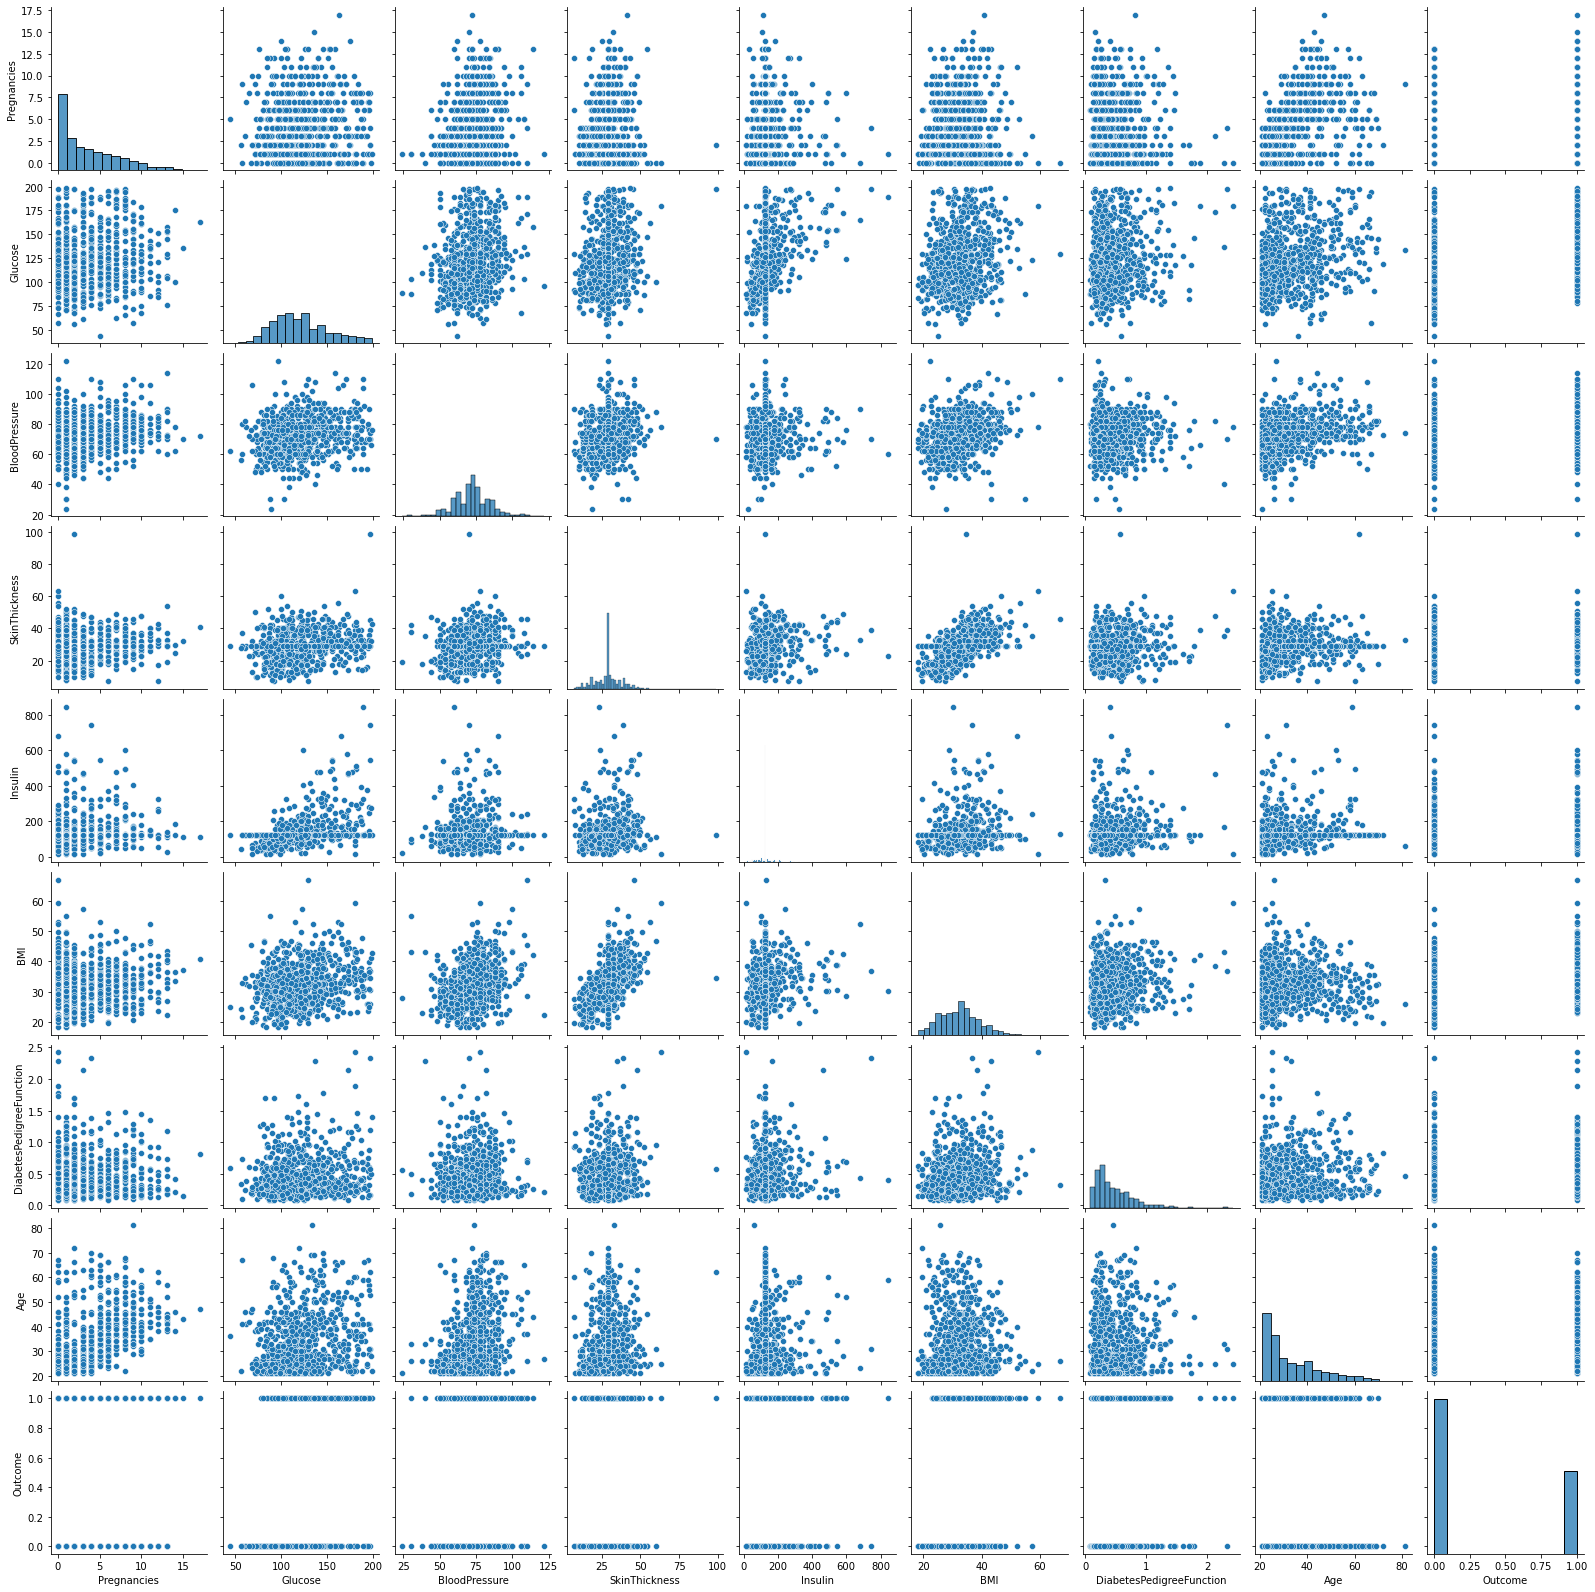

In [25]:
p = sns.pairplot(proj_data_copy1)

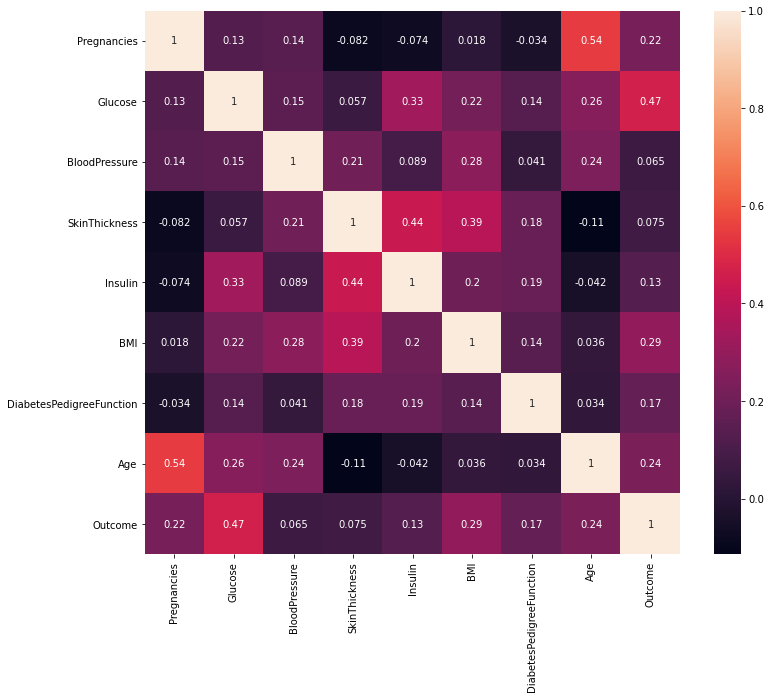

In [35]:
#lets make a heatmap of unclean data
plt.figure(figsize=(12,10))
p= sns.heatmap(proj_data.corr(),annot=True)

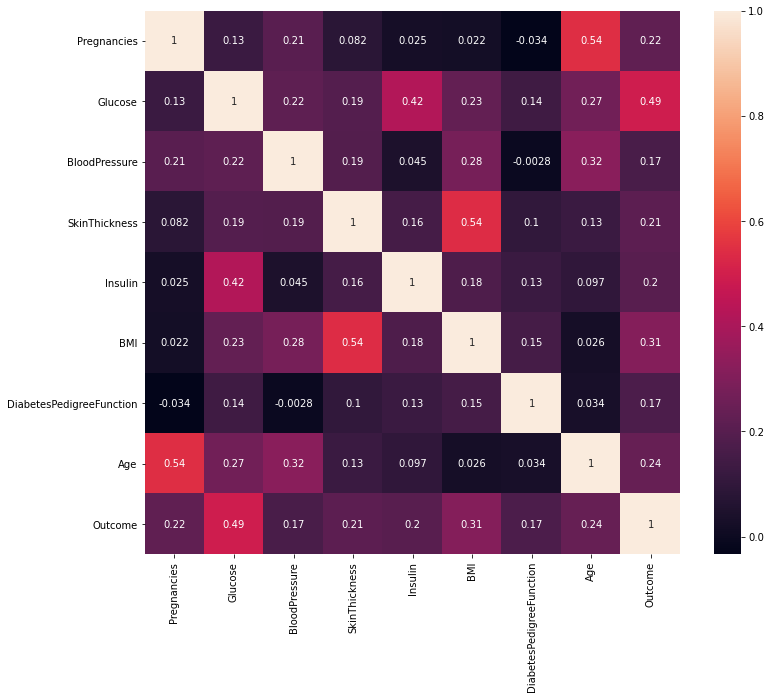

In [37]:
#lets make a heatmap of clean data
plt.figure(figsize=(12,10))
p= sns.heatmap(proj_data_copy1.corr(),annot=True)

In [42]:
#now we are going to do scaling of the data 
#we are going to use stanrdization

from sklearn.preprocessing import StandardScaler
scale_X = StandardScaler()
X = scale_X.fit_transform(proj_data_copy1.drop(['Outcome'],axis=1))
X = pd.DataFrame(X,columns=['Pregnency','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
X.head()

,Pregnency,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [43]:
from sklearn.model_selection import train_test_split
y = proj_data_copy1.Outcome
#   X is already defined in the standardization section
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=1/3,random_state=42,stratify=y)

In [46]:
from sklearn.neighbors import KNeighborsClassifier

training_score =[]
testing_score =[]

for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    training_score.append(knn.score(X_train,y_train))
    testing_score.append(knn.score(X_test,y_test))


max_testing_score = max(testing_score)
test_scores_ind = [i for i, v in enumerate(testing_score) if v == max_testing_score]
print('Max testing score {} % and k = {}'.format(max_testing_score*100,list(map(lambda x: x+1, test_scores_ind))))
    
    

Max testing score 76.5625 % and k = [11]


D:\anc\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anc\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


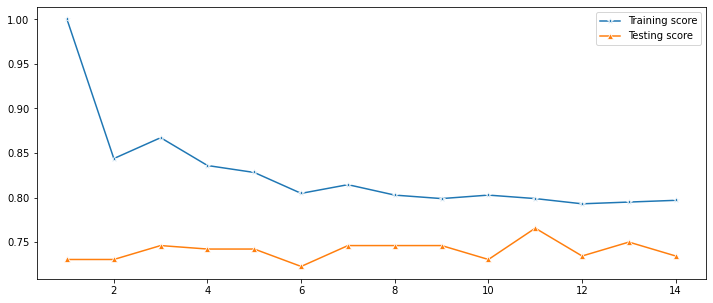

In [50]:
plt.figure(figsize=(12,5))
pplot = sns.lineplot(range(1,15),training_score,marker='*',label = 'Training score')
pplot = sns.lineplot(range(1,15),testing_score,marker='^',label = 'Testing score')

In [51]:
#Now we are going to make this k = 11 model as testing is high in this case

In [60]:
knn=KNeighborsClassifier(11)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)*100 

76.5625